**HMW_3 : Data visualisation**

Stat on Global comdom usage 

In [80]:
#Import the libraries
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd 
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Fetch the database 
path = 'Rich_Global_Condom_Usage_Dataset-Clean_2.csv'
df = pd.read_csv (path)
df.head()

,Year,Country,Total Sales (Million Units),Market Revenue (Million USD),Government Campaigns,Awareness Index (0-10),Most Popular Condom Type,Contraceptive Usage Rate (%),Teen Pregnancy Rate (per 1000 teens),HIV Prevention Awareness (%),Online Sales (%),Average Price per Condom (USD),Male Purchases (%),Female Purchases (%),Brand Dominance,Sex Education Programs (Yes/No)
0,2015,USA,378,276.304977,No,2.93,Latex,27.10,58.37,89.17,45.00,1.34,69%,39%,Kamasutra,No
1,2015,USA,1875,3002.379846,No,9.28,Ultra-Thin,63.97,50.63,69.25,57.10,2.43,50%,33%,Skyn,No
2,2015,USA,2496,6564.222333,Yes,5.26,Non-Latex,56.21,42.23,56.13,59.52,2.30,46%,54%,Skyn,Yes
3,2015,USA,1437,4993.892125,Yes,3.63,Non-Latex,89.71,55.86,78.36,56.83,2.48,49%,57%,Manforce,No
4,2015,USA,1923,5355.152313,Yes,5.71,Non-Latex,86.96,7.82,37.61,47.99,0.34,40%,29%,Trojan,Yes


Year            2015    2016    2017    2018    2019    2020    2021    2022  \
Country                                                                        
Australia     65.884  45.332  42.944  47.248  53.078  57.962  41.406  49.276   
Brazil        54.228  58.118  56.884  69.626  65.318  52.866  67.658  77.326   
China         50.328  55.368  47.730  54.996  62.568  63.672  50.850  66.140   
France        50.598  47.054  64.160  65.042  52.408  58.476  55.244  63.476   
Germany       54.668  70.848  54.724  66.942  66.842  52.252  57.810  37.322   
India         49.930  64.148  34.378  42.204  55.972  37.106  63.434  66.074   
Japan         38.540  41.508  65.190  43.588  65.412  50.768  60.352  55.518   
South Africa  54.680  56.366  56.816  54.650  53.846  56.446  44.236  46.730   
UK            61.866  36.400  70.022  57.344  73.546  51.978  73.794  56.582   
USA           64.790  49.468  33.518  38.252  52.292  41.064  70.252  66.914   

Year            2023    2024    2025  


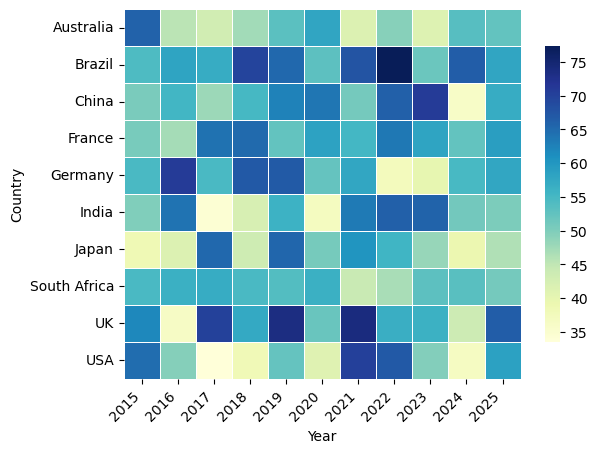

In [65]:
df_heatmap = df[['Country', 'Year', 'Contraceptive Usage Rate (%)']].copy()
df_heatmap_conf = df_heatmap.groupby(['Country', 'Year'])['Contraceptive Usage Rate (%)'].mean().reset_index()
pivot_df = df_heatmap_conf.pivot_table(
    index='Year',
    columns='Country',
    values='Contraceptive Usage Rate (%)',
    aggfunc='mean'  # or 'sum', 'median', etc.
)
pivot_df = pivot_df.transpose()
print(pivot_df)

# plot
sns.heatmap(pivot_df, cmap='YlGnBu', fmt=".1f", linewidths=.5, cbar_kws={"shrink": .8}, cbar=True)
plt.xticks(rotation=45, ha='right')
plt.show()

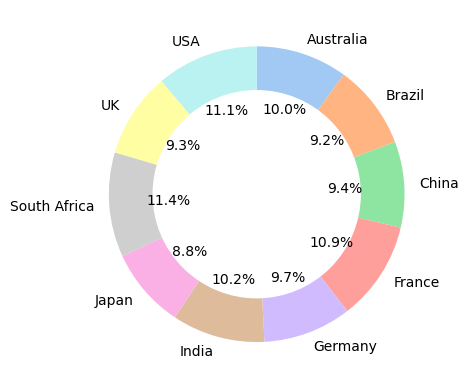

In [ ]:

df_donnot = df[['Country', 'Teen Pregnancy Rate (per 1000 teens)']].copy()
df_donnot = df_donnot.groupby(['Country'])['Teen Pregnancy Rate (per 1000 teens)'].mean().reset_index()
sum_preg = df_donnot['Teen Pregnancy Rate (per 1000 teens)'].sum()
df_donnot.set_index(df_donnot['Country'], inplace=True)



plt.pie(df_donnot["Teen Pregnancy Rate (per 1000 teens)"], labels=df_donnot['Country'], startangle=90, counterclock=False, autopct='%1.1f%%', colors=sns.color_palette("pastel"), wedgeprops=dict(width=0.3))
# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

,Country,Teen Pregnancy Rate (per 1000 teens)
0,Australia,34.806000
1,Brazil,32.144364
2,China,32.636364
3,France,37.809273
4,Germany,33.582000


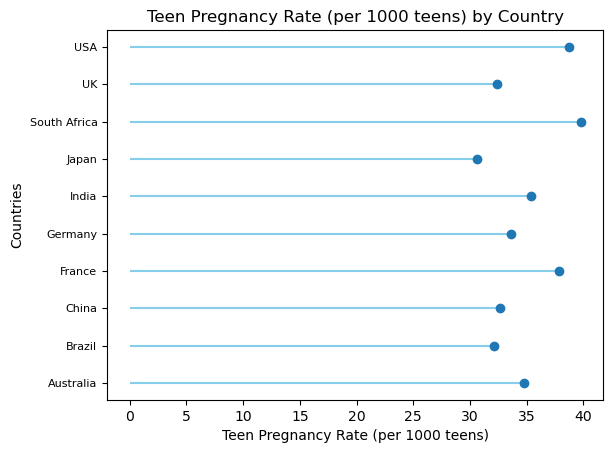

In [99]:
df_lolipop = df[['Country', 'Teen Pregnancy Rate (per 1000 teens)']].copy()
df_lolipop = df_lolipop.groupby(['Country'])['Teen Pregnancy Rate (per 1000 teens)'].mean().reset_index()
sum_lolipop = df_lolipop['Teen Pregnancy Rate (per 1000 teens)'].sum()
#df_lolipop['Teen Pregnancy Rate (per 1000 teens)'] = df_lolipop['Teen Pregnancy Rate (per 1000 teens)'] / sum_lolipop  
display(df_lolipop.head())
ordered_lolipop = df_lolipop
#ordered_lolipop = df_lolipop.sort_values(by='Teen Pregnancy Rate (per 1000 teens)', ascending=False)
my_range=range(1,len(df_lolipop.index)+1)

# Make the plot
# The horizontal plot is made using the hline function
plt.hlines(y=my_range, xmin=0, xmax=ordered_lolipop['Teen Pregnancy Rate (per 1000 teens)'], color='skyblue')
plt.plot(ordered_lolipop['Teen Pregnancy Rate (per 1000 teens)'], my_range, "o")
 
# Add titles and axis names

#plt.stem(ordered_lolipop['Country'])
plt.yticks( my_range, ordered_lolipop['Country'], fontsize=8)
plt.xlabel('Teen Pregnancy Rate (per 1000 teens)')
plt.ylabel('Countries')
plt.title('Teen Pregnancy Rate (per 1000 teens) by Country')
plt.show()

In [ ]:
# Data set


# url = 'https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/data/mtcars.csv'
# df__ = pd.read_csv(url)
# df__ = df__.set_index('model')
# display(df__.head())
df_ = pd.DataFrame({'group':list(map(chr, range(65, 85))), 'values':np.random.uniform(size=20) })
display(df_.head())

,group,values
0,A,0.205800
1,B,0.827992
2,C,0.552127
3,D,0.175159
4,E,0.168101


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'USA'),
  Text(1, 0, 'India'),
  Text(2, 0, 'UK'),
  Text(3, 0, 'Brazil'),
  Text(4, 0, 'Germany'),
  Text(5, 0, 'South Africa'),
  Text(6, 0, 'China'),
  Text(7, 0, 'Japan'),
  Text(8, 0, 'France'),
  Text(9, 0, 'Australia')])

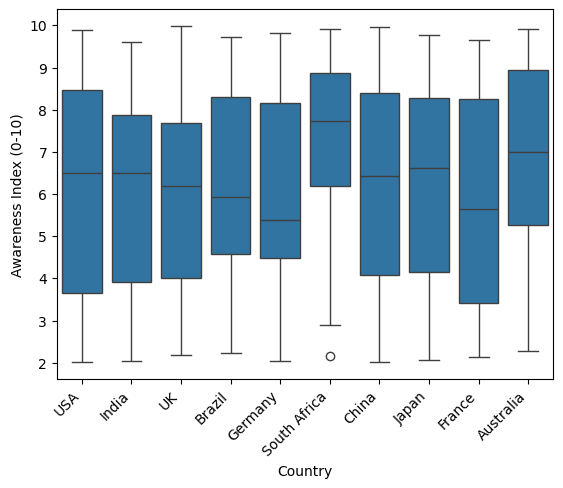

In [104]:
sns.boxplot(x=df["Country"], y=df["Awareness Index (0-10)"])
plt.xticks(rotation=45, ha='right')